# Simple Logit Example in Python

In [40]:

#basic imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#matplotlib inline

from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm


## Read in Data

In [41]:
dd = pd.read_csv("ISLR-Default.csv")
print(dd.shape)
dd.head()

(10000, 4)


default student      balance        income
0      No      No   729.526495  44361.625074
1      No     Yes   817.180407  12106.134700
2      No      No  1073.549164  31767.138947
3      No      No   529.250605  35704.493935
4      No      No   785.655883  38463.495879

## Plot the data

<AxesSubplot:title={'center':'balance'}, xlabel='default'>

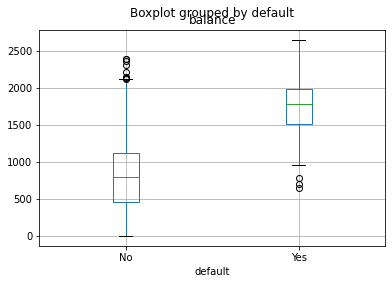

In [42]:
dd.boxplot(column="balance",by="default")

## Fit the Logit

In [56]:
## get x and y as numpy arrays
X = dd["balance"].to_numpy().reshape((dd.shape[0],1))
y = np.where(dd["default"]=='No',0,1)

In [57]:
#sklearn
lfit = LogisticRegression(penalty='none')
lfit.fit(X,y)
print(lfit.intercept_,lfit.coef_)

[-10.65132867] [[0.00549892]]


In [58]:
phat = lfit.predict_proba(X)[:,1]

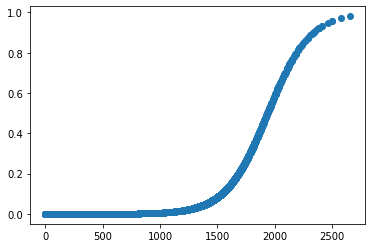

In [59]:
plt.scatter(X,phat)

In [62]:
# statsmodels
XX = sm.add_constant(X)
lfit2 = sm.Logit(y, XX).fit()
print(lfit2.summary())

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Sun, 02 Jan 2022   Pseudo R-squ.:                  0.4534
Time:                        16:04:32   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.233e-290
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6513      0.361    -29.491      0.000     -11.359      -9.943
x1             0.0055      0

## Check

In [66]:
eta = lfit.intercept_ + lfit.coef_[0] * X[:,0]
phat0 = 1.0/(1.0 + np.exp(-eta))
diff = pd.Series(phat-phat0)
diff.describe()

count    10000.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
dtype: float64

In [67]:
diff[:20]

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
dtype: float64